### TAREA 2 - Limpieza y alistamiento de datos
### Cargo: Ingeniería de Datos: Nicolas Alvarez 

In [1]:
import pandas as pd
dataFrame = pd.read_csv('data.txt')
dataFrame


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [2]:
# Buscar duplicados
dataFrame.duplicated().sum() #Respuesta: 0

#Identificar errores estructurales
dataFrame.isnull().values.any()     #Anwser: True --> ¿Dónde están los datos nulos?
dataFrame.isnull().sum()   # 506 NaNs en la columna wip
DataFrame = dataFrame.dropna(inplace=False)
print("NaNs por cada fila del DataFrame: ")
DataFrame.isnull().sum()   # 0 NaNs en la columna wip

NaNs por cada fila del DataFrame: 


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [12]:
df_finishing = dataFrame[dataFrame["department"]=="finishing"]
df_finishing 
#jajajaaja

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
18,1/1/2015,Quarter1,finishing,Thursday,11,0.70,4.15,NaN,1440,0,0.0,0,0,12.0,0.436326
602,2/4/2015,Quarter1,finishing,Wednesday,2,0.80,3.94,NaN,2160,0,0.0,0,0,18.0,0.966759
603,2/4/2015,Quarter1,finishing,Wednesday,1,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.929183
604,2/4/2015,Quarter1,finishing,Wednesday,8,0.70,4.15,NaN,3000,0,0.0,0,0,25.0,0.915767
608,2/4/2015,Quarter1,finishing,Wednesday,7,0.70,3.94,NaN,960,0,0.0,0,0,8.0,0.779792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
DataFrame  #  Observamos que ya no hay NaNs

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [4]:
DataFrame["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

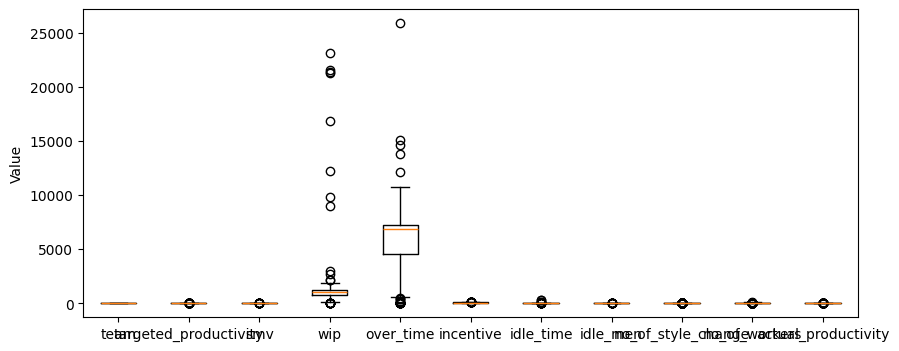

In [5]:
import matplotlib.pyplot as plt
import numpy as np
numeric_cols = DataFrame.select_dtypes(include=[np.number]).columns
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.boxplot(DataFrame[numeric_cols].values)
ax.set_xticklabels(numeric_cols)
ax.set_ylabel('Value')
plt.show() 
#Ahora --> Hacer una para cada variable para que todo esté en escala

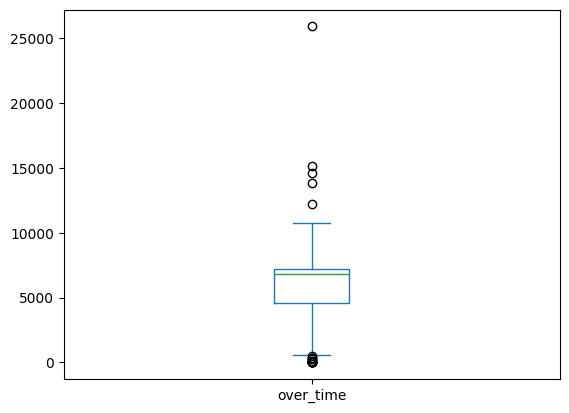

In [6]:
DataFrame["over_time"].plot.box()
plt.show() 

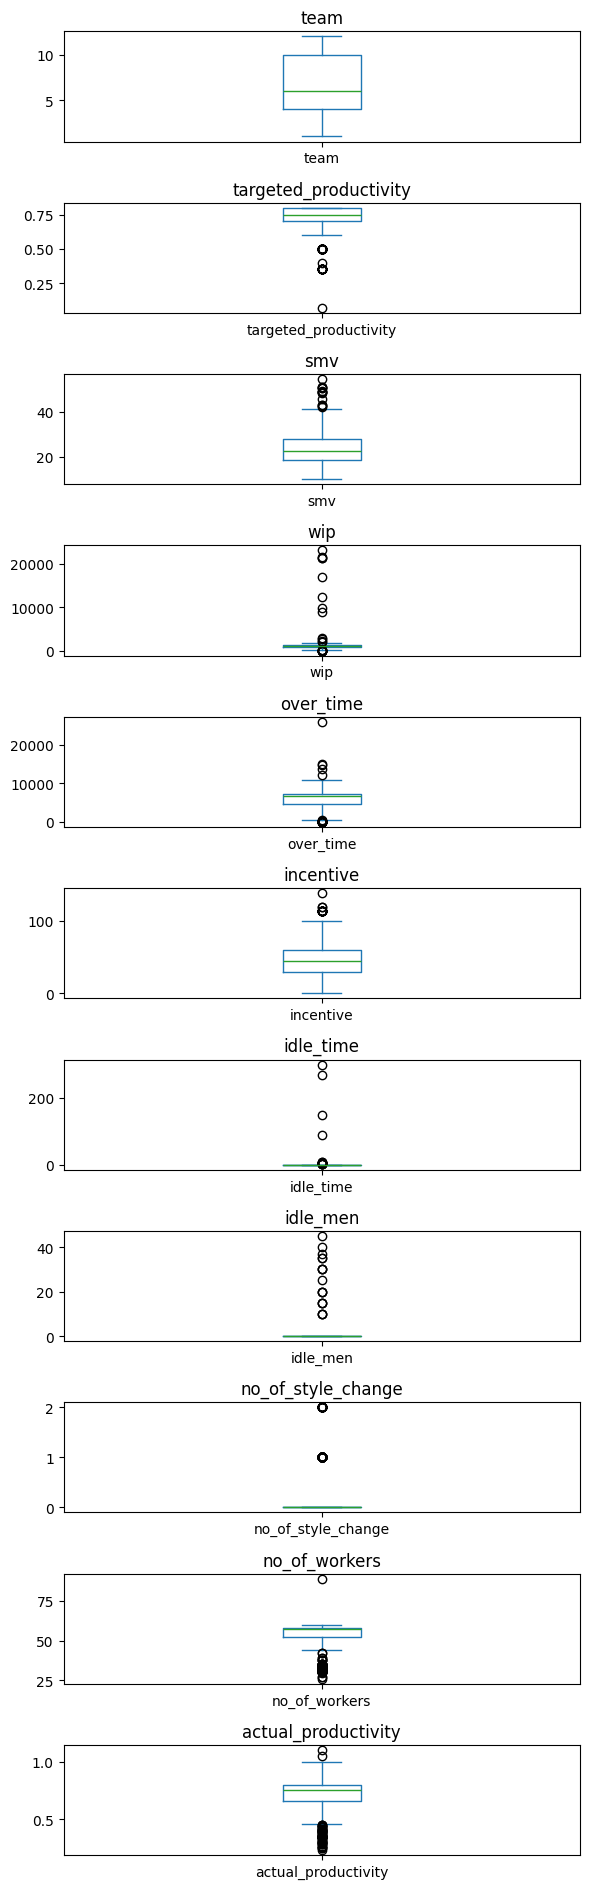

In [7]:
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(6, 19))
for i, col in enumerate(numeric_cols):
    DataFrame[col].plot.box(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from scipy import stats
numeric_cols = DataFrame.select_dtypes(include=[np.number])
arr = numeric_cols.to_numpy()
z = np.abs(stats.zscore(arr))
outliers = DataFrame[z > 3]
outliers.describe() #97 outliers identificados
outliers 
### Dejemos los outliers y luego identificar por qué suceden


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
59,1/4/2015,Quarter1,sweing,Sunday,5,0.70,45.67,884.0,6960,26,0.0,0,0,58.0,0.603432
138,1/8/2015,Quarter2,sweing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
147,1/8/2015,Quarter2,sweing,Thursday,5,0.70,42.41,724.0,10260,0,0.0,0,0,57.0,0.233705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,3/1/2015,Quarter1,sweing,Sunday,7,0.80,30.10,934.0,6960,0,3.5,15,0,58.0,0.579511
1046,3/3/2015,Quarter1,sweing,Tuesday,2,0.40,15.28,157.0,5400,0,6.5,30,1,45.0,0.302770
1046,3/3/2015,Quarter1,sweing,Tuesday,2,0.40,15.28,157.0,5400,0,6.5,30,1,45.0,0.302770
1085,3/5/2015,Quarter1,sweing,Thursday,7,0.80,30.10,834.0,1200,0,4.0,40,0,59.0,0.366054


In [9]:
outliers.shape


(97, 15)

In [70]:
DataFrame.describe()   #  WIP promedio = 1190.465  over_time promedio = 6508.20
grupos = []
for i in range(len(outliers)):
    grupos.append(outliers.iloc[i,4])
frecuencias = {}
for i in range(len(grupos)):
    if grupos[i] in frecuencias:
        frecuencias[grupos[i]]+=1
    else:
        frecuencias[grupos[i]]=1
print(frecuencias)
#print(grupos)
primero = max(frecuencias, key=frecuencias.get)
print(f"El equipo que más aparece en los outliers: {primero}")  
# El team 11 es el que más aparece en el dataset de OUTLIERS 
segundo = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[1]
print(segundo)
tercero = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[2]
print(tercero)


{5: 7, 12: 3, 11: 20, 4: 8, 10: 7, 2: 4, 1: 7, 7: 12, 6: 3, 9: 2, 8: 16, 3: 8}
El equipo que más aparece en los outliers: 11
(8, 16)
(7, 12)
